# Intake to load CMIP data

## Using intake-esm on mistral
- install intake-esm: https://intake-esm.readthedocs.io/en/latest/installation.html
- check the already built catalogs: `/home/mpim/m300524/.intake_esm/collections` and copy to `/home/mpim/mxxxxxx/.intake_esm/collections` skip long catalog building process

In [207]:
import intake
import xarray as xr
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
%matplotlib inline
xr.set_options(keep_attrs=True)

# CMIP5

In [462]:
collection_input_definition = '/home/mpim/m300524/pymistral/intake/cmip5_collection_mistral.yml'

In [463]:
col = intake.open_esm_metadatastore(collection_input_definition=collection_input_definition, overwrite_existing=False)

In [464]:
col.df.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
0,CMIP5,r2i1p1,decadal1960,hfss_3hr_FGOALS-g2_decadal1960_r2i1p1_19910101...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010130-199101202230,hfss,v0
1,CMIP5,r2i1p1,decadal1960,rsdsdiff_3hr_FGOALS-g2_decadal1960_r2i1p1_1991...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010130-199101202230,rsdsdiff,v0
2,CMIP5,r2i1p1,decadal1960,huss_3hr_FGOALS-g2_decadal1960_r2i1p1_19910101...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010300-199101210000,huss,v0
3,CMIP5,r1i1p1,decadal1960,ps_3hr_FGOALS-g2_decadal1960_r1i1p1_1991010103...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010300-199101260000,ps,v0
4,CMIP5,r1i1p1,decadal1960,rsuscs_3hr_FGOALS-g2_decadal1960_r1i1p1_199101...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010130-199101252230,rsuscs,v0


In [465]:
cmip5_variables = col.df['variable'].unique()

In [466]:
for v in ['institute','model','experiment','frequency','mip_table','modeling_realm','product']:
    print(v,col.df[v].unique(),'\n')

institute ['LASG-CESS' 'LASG-IAP' 'CCCma' 'CSIRO-QCCCE' 'BCC' 'ICHEC' 'CSIRO-BOM'
 'NSF-DOE-NCAR' 'MOHC' 'NOAA-GFDL' 'INM' 'IPSL' 'CNRM-CERFACS' 'MIROC'
 'MPI-M' 'MRI' 'NCC' 'NCAR' 'CMCC' 'BNU' 'NASA-GMAO' 'NASA-GISS'
 'NIMR-KMA' 'FIO' 'NICAM' 'NOAA-NCEP' 'COLA-CFS' 'INPE'] 

model ['FGOALS-g2' 'FGOALS-s2' 'CanESM2' 'CanAM4' 'FGOALS-gl' 'CSIRO-Mk3-6-0'
 'bcc-csm1-1' 'EC-EARTH' 'ACCESS1-0' 'ACCESS1-3' 'CESM1-WACCM'
 'HadGEM2-ES' 'GFDL-ESM2M' 'inmcm4' 'IPSL-CM5A-LR' 'HadGEM2-A' 'GFDL-CM3'
 'GFDL-HIRAM-C360' 'GFDL-CM2p1' 'GFDL-ESM2G' 'GFDL-HIRAM-C180' 'CNRM-CM5'
 'HadCM3' 'MIROC4h' 'MIROC5' 'MPI-ESM-LR' 'MRI-CGCM3' 'NorESM1-M'
 'MRI-AGCM3-2H' 'MRI-AGCM3-2S' 'HadGEM2-CC' 'MIROC-ESM' 'MIROC-ESM-CHEM'
 'MPI-ESM-P' 'IPSL-CM5A-MR' 'IPSL-CM5B-LR' 'CCSM4' 'NorESM1-ME'
 'MPI-ESM-MR' 'CMCC-CM' 'CESM1-CAM5-1-FV2' 'BNU-ESM' 'GEOS-5' 'GISS-E2-R'
 'GISS-E2-H' 'HadGEM2-AO' 'CESM1-CAM5' 'FIO-ESM' 'CESM1-FASTCHEM'
 'fio-esm' 'CESM1-BGC' 'CanCM4' 'MRI-ESM1' 'NICAM-09' 'bcc-csm1-1-m'
 'CMCC-CMS' 'GISS-E2-R

## example: GMST historical

In [519]:
v='ts'

In [536]:
ensemble_member=[f'r{i}i1p1' for i in range(1,4)]
ensemble_member

['r1i1p1', 'r2i1p1', 'r3i1p1']

In [537]:
cat = col.search(experiment='historical',variable=v,mip_table='Amon',ensemble_member=ensemble_member)

In [538]:
cat.query_results.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
561030,CMIP5,r1i1p1,historical,ts_Amon_bcc-csm1-1-m_historical_r1i1p1_185001-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Amon,bcc-csm1-1-m,atmos,output1,185001-201212,ts,v20120709
560974,CMIP5,r2i1p1,historical,ts_Amon_bcc-csm1-1-m_historical_r2i1p1_185001-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Amon,bcc-csm1-1-m,atmos,output1,185001-201212,ts,v20120709
560898,CMIP5,r3i1p1,historical,ts_Amon_bcc-csm1-1-m_historical_r3i1p1_185001-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Amon,bcc-csm1-1-m,atmos,output1,185001-201212,ts,v20120709
25013,CMIP5,r1i1p1,historical,ts_Amon_bcc-csm1-1_historical_r1i1p1_185001-20...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Amon,bcc-csm1-1,atmos,output1,185001-201212,ts,v0
24958,CMIP5,r2i1p1,historical,ts_Amon_bcc-csm1-1_historical_r2i1p1_185001-20...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Amon,bcc-csm1-1,atmos,output1,185001-201212,ts,v0


In [539]:
cat.query_results['model'].unique()

array(['bcc-csm1-1-m', 'bcc-csm1-1', 'BNU-ESM', 'CanCM4', 'CanESM2',
       'CMCC-CESM', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5-2', 'CNRM-CM5',
       'ACCESS1-0', 'ACCESS1-3', 'CSIRO-Mk3-6-0', 'FIO-ESM', 'fio-esm',
       'EC-EARTH', 'inmcm4', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR',
       'IPSL-CM5B-LR', 'FGOALS-g2', 'FGOALS-s2', 'MIROC-ESM-CHEM',
       'MIROC-ESM', 'MIROC4h', 'MIROC5', 'HadCM3', 'HadGEM2-CC',
       'HadGEM2-ES', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MPI-ESM-P', 'MRI-CGCM3',
       'MRI-ESM1', 'GISS-E2-H-CC', 'GISS-E2-H', 'GISS-E2-R-CC',
       'GISS-E2-R', 'CCSM4', 'NorESM1-M', 'NorESM1-ME', 'HadGEM2-AO',
       'GFDL-CM2p1', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'CESM1-BGC',
       'CESM1-CAM5-1-FV2', 'CESM1-CAM5', 'CESM1-FASTCHEM', 'CESM1-WACCM'],
      dtype=object)

In [540]:
hist = cat.to_dask()

In [563]:
type(hist)

dict

In [565]:
hist['BCC.bcc-csm1-1.historical.mon.atmos']

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 64, lon: 128, member_id: 3, time: 1956)
Coordinates:
  * time       (time) float64 15.5 45.0 74.5 ... 5.942e+04 5.945e+04 5.948e+04
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * member_id  (member_id) <U6 'r1i1p1' 'r2i1p1' 'r3i1p1'
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(1956, 2), chunksize=(1956, 2)>
    lat_bnds   (lat, bnds) float64 dask.array<shape=(64, 2), chunksize=(64, 2)>
    lon_bnds   (lon, bnds) float64 dask.array<shape=(128, 2), chunksize=(128, 2)>
    ts         (member_id, time, lat, lon) float32 dask.array<shape=(3, 1956, 64, 128), chunksize=(1, 1956, 64, 128)>
Attributes:
    table_id:               Table Amon (11 April 2011) 1cfdc7322cf2f4a3261482...
    project_id:             CMIP5
    experiment_id:          historical
    contact:           

In [553]:
# get one dataarray of global mean values from dict
modellist=[]
res=[]
for name, ds in hist.items():
    name = name.split('.')[1]
    ds = ds[v]
    #print(name,ds.coords)
    print(name)
    spatial_dims = list(ds.dims)
    for dim in ['time','member_id']:
        if dim in ds.dims:
            spatial_dims.remove(dim)
    #print(spatial_dims)
    if 'depth' in ds.coords:
        del ds['depth']
    # all need the same time to concat
    # 1872/12
    if ds.time.size == 156*12 and name not in modellist:
        if 'member_id' in ds.coords:
            ds['member_id']=np.arange(1,1+ds.member_id.size)
        ds['time'] = xr.cftime_range(start='1850',periods=ds.time.size,freq='M')
        res.append(ds.mean(spatial_dims))
        modellist.append(name)

bcc-csm1-1
bcc-csm1-1-m
BNU-ESM
CanCM4
CanESM2
CMCC-CESM
CMCC-CM
CMCC-CMS
CNRM-CM5
CNRM-CM5-2
ACCESS1-0
ACCESS1-3
CSIRO-Mk3-6-0
FIO-ESM
fio-esm
EC-EARTH
inmcm4
IPSL-CM5A-LR
IPSL-CM5A-MR
IPSL-CM5B-LR
FGOALS-g2
FGOALS-s2
MIROC-ESM
MIROC-ESM-CHEM
MIROC4h
MIROC5
HadCM3
HadGEM2-CC
HadGEM2-ES
MPI-ESM-LR
MPI-ESM-MR
MPI-ESM-P
MRI-CGCM3
MRI-ESM1
GISS-E2-H
GISS-E2-H-CC
GISS-E2-R
GISS-E2-R-CC
CCSM4
NorESM1-M
NorESM1-ME
HadGEM2-AO
GFDL-CM2p1
GFDL-CM3
GFDL-ESM2G
GFDL-ESM2M
CESM1-BGC
CESM1-CAM5
CESM1-CAM5-1-FV2
CESM1-FASTCHEM
CESM1-WACCM


In [555]:
# ensure all have same amounts of members
res2=[]
for i in res:
    if 'member_id' not in i.coords:
        d = i.expand_dims('member_id')
        d = d.isel(member_id=[0]*res[1].member_id.size)
    else:
        d = i
    #d['member_id'] = res[1].member_id
    res2.append(d)

In [556]:
res = xr.concat(res2,'model',coords='all')
res['model']=modellist

res = res.compute()

In [557]:
# yearmean and anomaly
def yearmonmean(ds):
    return ds.groupby('time.year').mean('time').rename({'year': 'time'})

res_ym = yearmonmean(res)
ana_ym = res_ym-res_ym.sel(time=slice(1850,1880)).mean('time')

In [558]:
def no_double_entries_in_legend(ax=None, **kwargs):
    from collections import OrderedDict
    if ax is None:
        ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), **kwargs)
    return ax

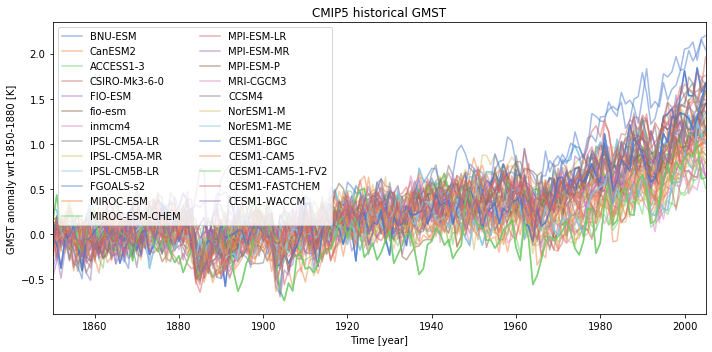

In [559]:
varname='GMST' #v
units = res.attrs['units']
import seaborn as sns
colors = sns.color_palette("muted", res.model.size).as_hex()

alpha=1
fig,ax=plt.subplots(figsize=(10,5))
for i, model in enumerate(ana_ym.model.values):
    c=colors[i]
    # same values for all members in ana_ym
    for member in ana_ym.member_id.values:
        ts = ana_ym.sel(member_id=member,model=model)
        if not ts.isnull().all():
            ts.plot(c=c,label=model,ax=ax,alpha=alpha/2)
no_double_entries_in_legend(ax=ax,ncol=2)
plt.xlim([ana_ym.time.min(),ana_ym.time.max()])
plt.title(' '.join(['CMIP5',experiment_id,varname]))
plt.xlabel('Time [year]')
plt.ylabel(f'{varname} anomaly wrt 1850-1880 [{units}]')
plt.tight_layout()

In [561]:
res.to_netcdf('CMIP5_GMST.nc')

# CMIP6

In [177]:
collection_input_definition = '/home/mpim/m300524/pymistral/intake/cmip6_collection_mistral.yml'

In [178]:
!cat /home/mpim/m300524/pymistral/intake/cmip6_collection_mistral.yml

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
name: cmip6_collection_mistral
collection_type: cmip6
data_sources:
  root_dir:
    name: MISTRAL
    loc_type: posix
    direct_access: True
    urlpath: /work/ik1017/CMIP6/data/CMIP6

In [180]:
col = intake.open_esm_metadatastore(collection_input_definition=collection_input_definition, overwrite_existing=False)

In [188]:
col.df.head()

,activity_id,experiment_id,file_basename,file_dirname,file_fullpath,grid_label,institution_id,member_id,mip_era,source_id,table_id,time_range,variable_id,version
0,CMIP,historical,ts_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_185...,/work/ik1017/CMIP6/data/CMIP6/CMIP/CAMS/CAMS-C...,/work/ik1017/CMIP6/data/CMIP6/CMIP/CAMS/CAMS-C...,gn,CAMS,r1i1p1f1,CMIP6,CAMS-CSM1-0,Amon,185001-201412,ts,v0
1,CMIP,historical,ps_Amon_CAMS-CSM1-0_historical_r1i1p1f1_gn_185...,/work/ik1017/CMIP6/data/CMIP6/CMIP/CAMS/CAMS-C...,/work/ik1017/CMIP6/data/CMIP6/CMIP/CAMS/CAMS-C...,gn,CAMS,r1i1p1f1,CMIP6,CAMS-CSM1-0,Amon,185001-201412,ps,v0
2,HighResMIP,highresSST-present,ua_day_CMCC-CM2-HR4_highresSST-present_r1i1p1f...,/work/ik1017/CMIP6/data/CMIP6/HighResMIP/CMCC/...,/work/ik1017/CMIP6/data/CMIP6/HighResMIP/CMCC/...,gn,CMCC,r1i1p1f1,CMIP6,CMCC-CM2-HR4,day,fixed,ua,v20170706
3,HighResMIP,highresSST-present,wap_day_CMCC-CM2-HR4_highresSST-present_r1i1p1...,/work/ik1017/CMIP6/data/CMIP6/HighResMIP/CMCC/...,/work/ik1017/CMIP6/data/CMIP6/HighResMIP/CMCC/...,gn,CMCC,r1i1p1f1,CMIP6,CMCC-CM2-HR4,day,fixed,wap,v20170706
4,HighResMIP,highresSST-present,wap_day_CMCC-CM2-HR4_highresSST-present_r1i1p1...,/work/ik1017/CMIP6/data/CMIP6/HighResMIP/CMCC/...,/work/ik1017/CMIP6/data/CMIP6/HighResMIP/CMCC/...,gn,CMCC,r1i1p1f1,CMIP6,CMCC-CM2-HR4,day,fixed,wap,v20170706


In [176]:
# available experiments
col.df['experiment_id'].unique()

array(['historical', 'highresSST-present', 'hist-1950', 'amip',
       'abrupt-4xCO2', 'abrupt-2xCO2', 'abrupt-0p5xCO2', 'piControl',
       '1pctCO2', 'aqua-control', 'ssp245', 'ssp585', 'ssp126', 'ssp119',
       'ssp370', 'esm-piControl', 'aqua-p4K', 'amip-future4K', 'esm-hist',
       'G1', 'abrupt-solp4p', 'piControl-spinup', 'hist-aer', 'hist-nat',
       'amip-4xCO2', 'amip-p4K', 'hist-GHG', 'hist-volc', 'aqua-4xCO2',
       'hist-sol', 'amip-m4K', 'land-hist', 'hist-stratO3', 'midHolocene',
       'lig127k', 'abrupt-solm4p', 'amip-lwoff', 'aqua-control-lwoff',
       'aqua-p4K-lwoff', 'amip-p4K-lwoff', 'esm-piControl-spinup',
       '1pctCO2-bgc', '1pctCO2-rad', 'piClim-ghg', 'piClim-control',
       'piClim-4xCO2', 'ssp245-GHG', 'ssp245-nat', 'dcppC-amv-pos',
       'dcppC-pac-control', 'dcppC-amv-Trop-pos', 'dcppC-pac-pacemaker',
       'dcppC-amv-neg', 'dcppC-ipv-NexTrop-pos', 'dcppC-ipv-neg',
       'dcppC-atl-control', 'dcppC-amv-ExTrop-pos',
       'dcppC-amv-ExTrop-neg',

## example: GMST historical

In [189]:
v='ts'
experiment_id='historical'

In [461]:
#member_id=[f'r{i}i1p1f1' for i in range(1,10)]

In [258]:
institution_id = list(col.df['institution_id'].unique())
# remove because of intake-esm errors
institution_id.remove('EC-Earth-Consortium')
institution_id.remove('NASA-GISS')

In [326]:
hist = col.search(experiment_id=experiment_id,variable_id=v,table_id='Amon', institution_id=institution_id)#, member_id=member_id)

In [327]:
hist.query_results.head()

,activity_id,experiment_id,file_basename,file_dirname,file_fullpath,grid_label,institution_id,member_id,mip_era,source_id,table_id,time_range,variable_id,version
33968,CMIP,historical,ts_Amon_IPSL-CM6A-LR_historical_r10i1p1f1_gr_1...,/work/ik1017/CMIP6/data/CMIP6/CMIP/IPSL/IPSL-C...,/work/ik1017/CMIP6/data/CMIP6/CMIP/IPSL/IPSL-C...,gr,IPSL,r10i1p1f1,CMIP6,IPSL-CM6A-LR,Amon,185001-201412,ts,v20180803
142750,CMIP,historical,ts_Amon_MIROC6_historical_r10i1p1f1_gn_185001-...,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...,gn,MIROC,r10i1p1f1,CMIP6,MIROC6,Amon,185001-194912,ts,v20181212
142751,CMIP,historical,ts_Amon_MIROC6_historical_r10i1p1f1_gn_195001-...,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...,/work/ik1017/CMIP6/data/CMIP6/CMIP/MIROC/MIROC...,gn,MIROC,r10i1p1f1,CMIP6,MIROC6,Amon,195001-201412,ts,v20181212
395128,CMIP,historical,ts_Amon_CESM2_historical_r10i1p1f1_gn_185001-1...,/work/ik1017/CMIP6/data/CMIP6/CMIP/NCAR/CESM2/...,/work/ik1017/CMIP6/data/CMIP6/CMIP/NCAR/CESM2/...,gn,NCAR,r10i1p1f1,CMIP6,CESM2,Amon,185001-189912,ts,v20190313
395129,CMIP,historical,ts_Amon_CESM2_historical_r10i1p1f1_gn_190001-1...,/work/ik1017/CMIP6/data/CMIP6/CMIP/NCAR/CESM2/...,/work/ik1017/CMIP6/data/CMIP6/CMIP/NCAR/CESM2/...,gn,NCAR,r10i1p1f1,CMIP6,CESM2,Amon,190001-194912,ts,v20190313


In [328]:
hist = hist.to_dask()

In [329]:
# get one dataarray of global mean values from dict
modellist=[]
res=[]
for name, ds in hist.items():
    name = name.split('.')[1]
    ds = ds[v]
    #print(name,ds.coords)
    print(name)
    spatial_dims = list(ds.dims)
    for dim in ['time','member_id']:
        if dim in ds.dims:
            spatial_dims.remove(dim)
    #print(spatial_dims)
    if 'depth' in ds.coords:
        del ds['depth']
    # all need the same time to concat
    if ds.time.size == 165*12 and name not in modellist:
        ds['time'] = xr.cftime_range(start='1850',periods=ds.time.size,freq='M')
        res.append(ds.mean(spatial_dims))
        modellist.append(name)

BCC-CSM2-MR
BCC-ESM1
CAMS-CSM1-0
CanESM5
CNRM-CM6-1
CNRM-ESM2-1
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
MIROC6
HadGEM3-GC31-LL
UKESM1-0-LL
MRI-ESM2-0
CESM2
CESM2-WACCM
GFDL-CM4
SAM0-UNICON


In [331]:
res = xr.concat(res,'model',coords='all')
res['model']=modellist

res = res.compute()

In [333]:
# yearmean and anomaly
res_ym = yearmonmean(res)
ana_ym = res_ym-res_ym.sel(time=slice(1850,1880)).mean('time')

In [459]:
#r=ana_ym.to_dataframe().unstack(0).unstack(0).dropna(axis=1)[v].mean(axis=0)
#(r.unstack().T>0).sum(axis=0)

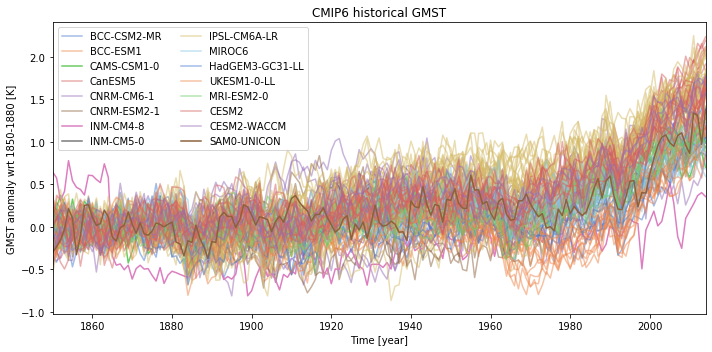

In [456]:
varname='GMST' #v
units = res.attrs['units']
import seaborn as sns
colors = sns.color_palette("muted", res.model.size).as_hex()

alpha=1
fig,ax=plt.subplots(figsize=(10,5))
for i, model in enumerate(ana_ym.model.values):
    c=colors[i]
    # same values for all members in ana_ym
    if model in ['CAMS-CSM1-0','INM-CM5-0','SAM0-UNICON','INM-CM4-8']:
        ana_ym.isel(member_id=0).sel(model=model).plot(c=c,label=model,ax=ax,alpha=alpha)
    else:
        for member in ana_ym.member_id.values:
            ts = ana_ym.sel(member_id=member,model=model)
            if not ts.isnull().all():
                ts.plot(c=c,label=model,ax=ax,alpha=alpha/2)
no_double_entries_in_legend(ax=ax,ncol=2)
plt.xlim([ana_ym.time.min(),ana_ym.time.max()])
plt.title(' '.join(['CMIP6',experiment_id,varname]))
plt.xlabel('Time [year]')
plt.ylabel(f'{varname} anomaly wrt 1850-1880 [{units}]')
plt.tight_layout()

In [339]:
res.to_netcdf('CMIP6_GMST.nc')